In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 10.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import cv2
from ultralytics import  YOLO

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 122MB/s]



image 1/1 /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg: 640x640 1 train, 2 trucks, 7.9ms
Speed: 13.0ms preprocess, 7.9ms inference, 774.4ms postprocess per image at shape (1, 3, 640, 640)


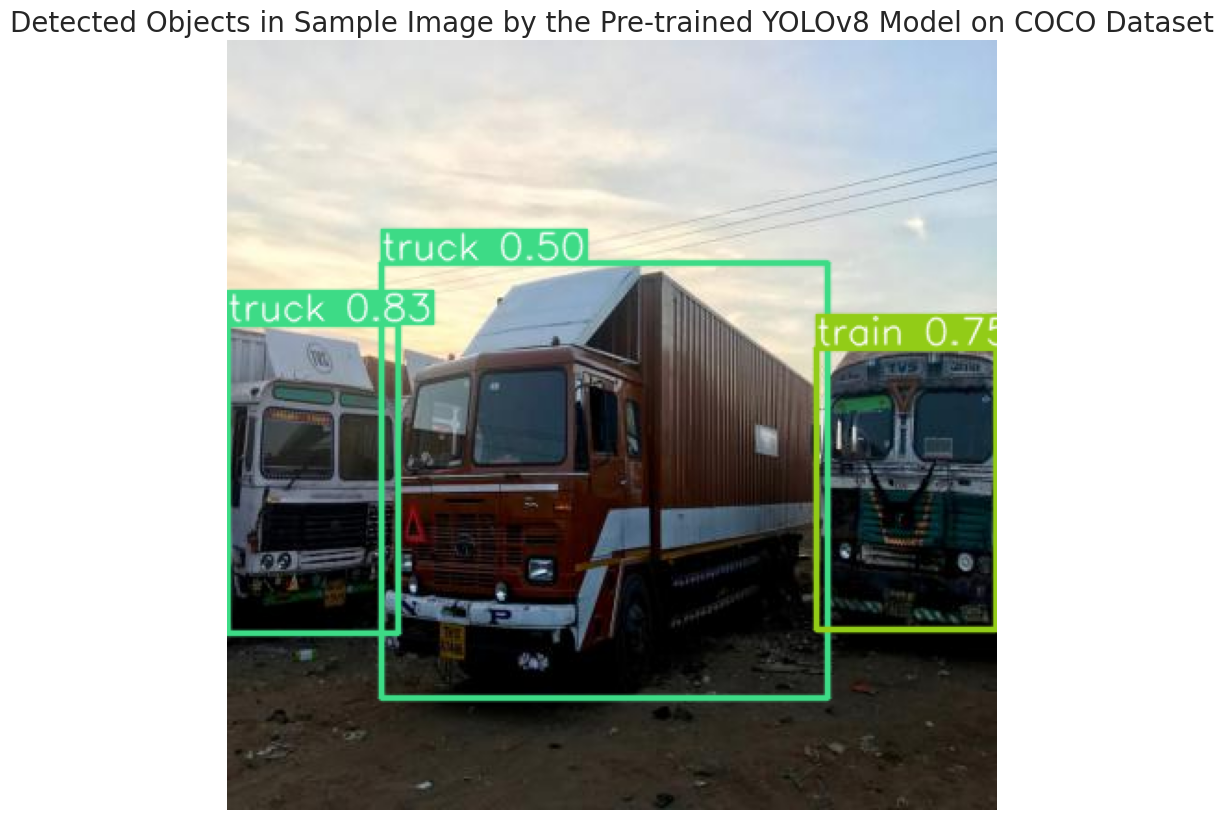

In [ ]:
# Path to the image file
image_path = '/content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path,
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(10,10))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
file_path='/content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/labels/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.txt'
#As per data.yaml class 3 belongs to trucks and we have 3 trucks in the above image and one image is detected as train
#so we have to configure our yolo,pt
with open(file_path, "r") as file:
    content = file.read()
    print(content)

3 0.11057692307692307 0.5745192307692307 0.21033653846153846 0.4182692307692308
3 0.4831730769230769 0.5769230769230769 0.5685096153846154 0.5661057692307693
3 0.8762019230769231 0.578125 0.234375 0.4338942307692308


In [ ]:
import os
import yaml
# Define the dataset_path
dataset_path = '/content/drive/MyDrive/Transport Detection.v1i.yolov8'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- bus
- car
- motorcycle
- truck
nc: 4
roboflow:
  license: CC BY 4.0
  project: transport-detection
  url: https://universe.roboflow.com/final-qualifying-work/transport-detection/dataset/1
  version: 1
  workspace: final-qualifying-work
test: ../test/images
train: ../train/images
val: ../valid/images



In [ ]:
from PIL import Image
# Set paths for training and validation image sets
train_images = os.path.join(dataset_path, 'train', 'images')
valid_images = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 3219
Number of validation images: 315
All training images have the same size: (416, 416)
All validation images have the same size: (416, 416)


In [ ]:
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.0+cu121 (Tesla T4)


In [ ]:
results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=20,              # Number of epochs to train for
    imgsz=416,               # Size of input images as integer
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=16,  # Number of images per batch
    device=1,
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0                   # Random seed for reproducibility
)

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Transport Detection.v1i.yolov8/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 27.1MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Transport Detection.v1i.yolov8/train/labels.cache... 3219 images, 34 backgrounds, 0 corrupt: 100%|██████████| 3219/3219 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/labels.cache... 315 images, 3 backgrounds, 0 corrupt: 100%|██████████| 315/315 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.21G      2.124      2.444      1.835         13        416: 100%|██████████| 202/202 [01:23<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        315       1890      0.442      0.383      0.364      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.09G      1.528      1.607      1.402         23        416: 100%|██████████| 202/202 [01:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]

                   all        315       1890      0.557      0.501      0.512      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.09G      1.429      1.431      1.319         12        416: 100%|██████████| 202/202 [00:59<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        315       1890      0.684      0.558      0.596      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       1.1G      1.353      1.313      1.261         44        416: 100%|██████████| 202/202 [00:58<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]

                   all        315       1890       0.75      0.599      0.694      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.08G      1.305      1.255      1.231         10        416: 100%|██████████| 202/202 [01:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]

                   all        315       1890      0.779      0.631      0.706      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.09G      1.263      1.175      1.209         50        416: 100%|██████████| 202/202 [00:59<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        315       1890       0.74      0.645      0.697      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.13G      1.238      1.123      1.191         22        416: 100%|██████████| 202/202 [00:58<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]


                   all        315       1890      0.829      0.652      0.749      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.09G      1.214        1.1      1.179         39        416: 100%|██████████| 202/202 [01:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.05it/s]


                   all        315       1890      0.783      0.666      0.745      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.08G      1.181      1.064      1.161         11        416: 100%|██████████| 202/202 [00:58<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        315       1890      0.798      0.646      0.742      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.15G      1.167      1.021      1.145         37        416: 100%|██████████| 202/202 [00:58<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]


                   all        315       1890      0.762      0.707      0.781      0.491
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.22G      1.102     0.8924      1.111         24        416: 100%|██████████| 202/202 [00:56<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        315       1890      0.808      0.699      0.783      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.08G      1.064     0.8358      1.092         37        416: 100%|██████████| 202/202 [00:54<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]

                   all        315       1890      0.852      0.704      0.796      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.09G      1.049     0.8285      1.085         27        416: 100%|██████████| 202/202 [00:54<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]

                   all        315       1890      0.822      0.723      0.799      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.09G       1.03      0.795      1.078         21        416: 100%|██████████| 202/202 [00:53<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]

                   all        315       1890      0.814      0.713        0.8      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.08G      1.009     0.7655      1.064          5        416: 100%|██████████| 202/202 [00:53<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]

                   all        315       1890      0.864      0.729      0.816       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.08G     0.9889     0.7453      1.061          6        416: 100%|██████████| 202/202 [00:54<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]

                   all        315       1890      0.862      0.708      0.814      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.09G     0.9782     0.7194      1.046         39        416: 100%|██████████| 202/202 [00:54<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        315       1890      0.869      0.739      0.833      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.08G     0.9606     0.7006      1.042         24        416: 100%|██████████| 202/202 [00:53<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        315       1890      0.826      0.749      0.819      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.09G     0.9537     0.6857      1.036         20        416: 100%|██████████| 202/202 [00:53<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]

                   all        315       1890      0.815      0.782      0.825       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.09G     0.9345     0.6677      1.027         37        416: 100%|██████████| 202/202 [00:54<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

                   all        315       1890      0.865      0.737      0.829      0.571



20 epochs completed in 0.349 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


                   all        315       1890      0.827      0.749       0.82      0.577
                   bus        315        103      0.838      0.652      0.755      0.539
                   car        315       1239      0.883      0.852      0.913      0.684
            motorcycle        315        379      0.803      0.787      0.822      0.488
                 truck        315        169      0.783      0.703      0.788      0.596
Speed: 0.5ms preprocess, 3.2ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/train


In [12]:
post_training_files_path = '/content/runs/detect/train'


In [13]:
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

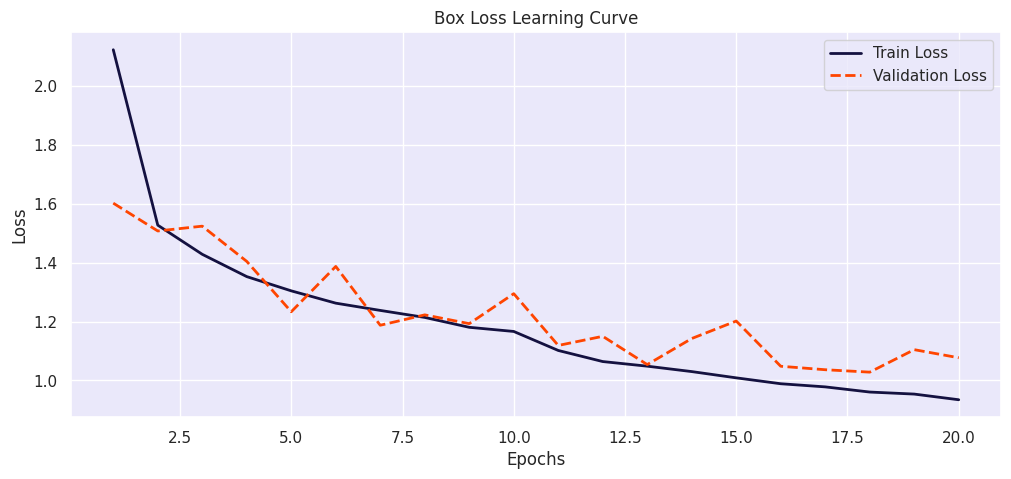

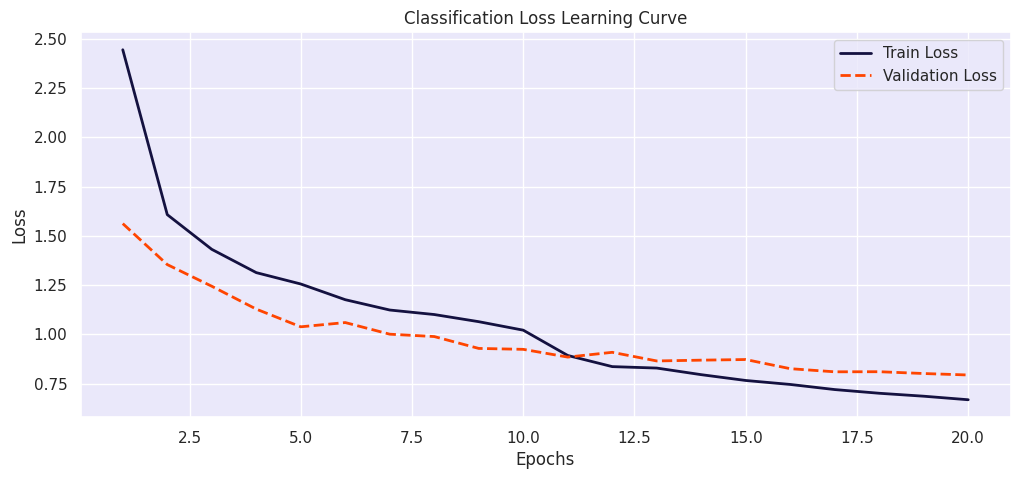

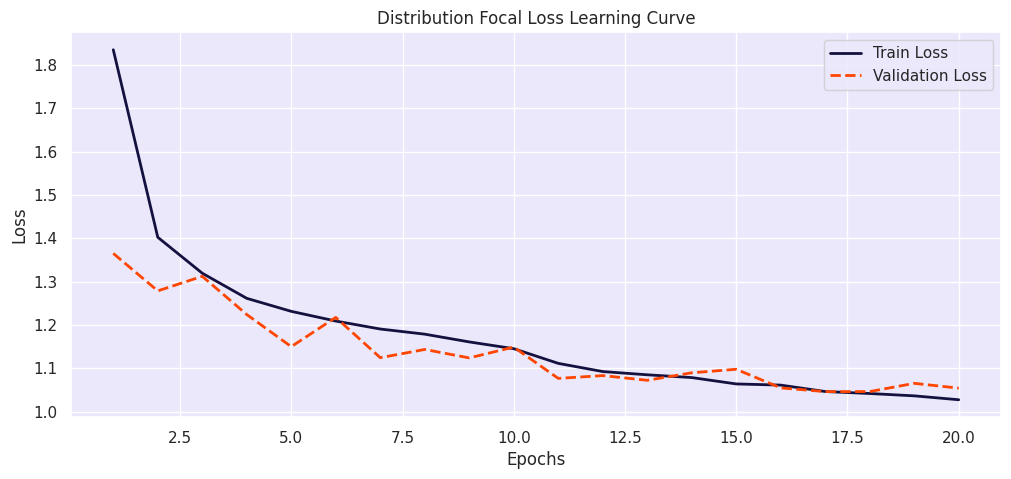

In [14]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

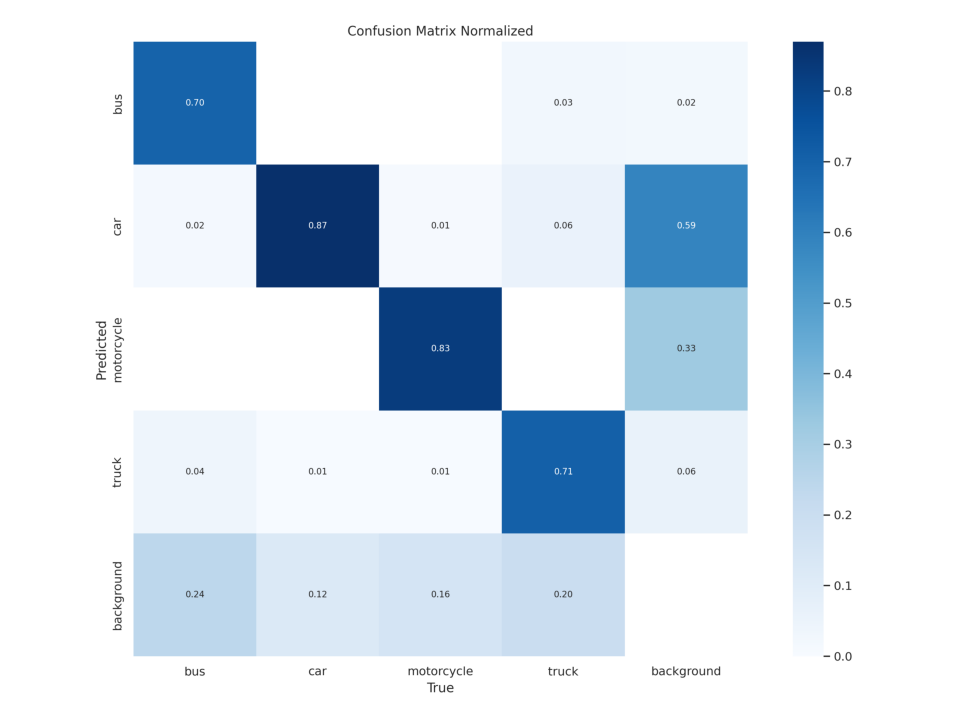

In [15]:
# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

In [16]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/labels.cache... 315 images, 3 backgrounds, 0 corrupt: 100%|██████████| 315/315 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


                   all        315       1890      0.829      0.749       0.82      0.576
                   bus        315        103      0.838      0.653      0.755      0.537
                   car        315       1239      0.884      0.852      0.913      0.684
            motorcycle        315        379      0.805      0.785      0.822      0.489
                 truck        315        169      0.788      0.704      0.788      0.596
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val


In [17]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

Metric Value
metrics/precision(B)         0.829
metrics/recall(B)            0.749
metrics/mAP50(B)             0.820
metrics/mAP50-95(B)          0.576
fitness                      0.601


image 1/1 /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/00--110-_jpg.rf.acbba7f18cb0047c7631aa2cc3e7fd30.jpg: 640x640 1 motorcycle, 1 truck, 14.9ms
Speed: 6.0ms preprocess, 14.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/00--251-_jpg.rf.cb5a49aeb3110afdb4f1180ce4a45ecf.jpg: 640x640 3 cars, 14.9ms
Speed: 3.9ms preprocess, 14.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/00--48-_jpg.rf.6e9089610003a5ab2bfd833ba1ff6573.jpg: 640x640 (no detections), 13.5ms
Speed: 8.1ms preprocess, 13.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/11--61-_png.rf.f12f10b4febc302d733f74e227509f37.jpg: 640x640 1 car, 21.6ms
Speed: 4.0ms preprocess, 21.6ms inference, 2.2ms postprocess per ima

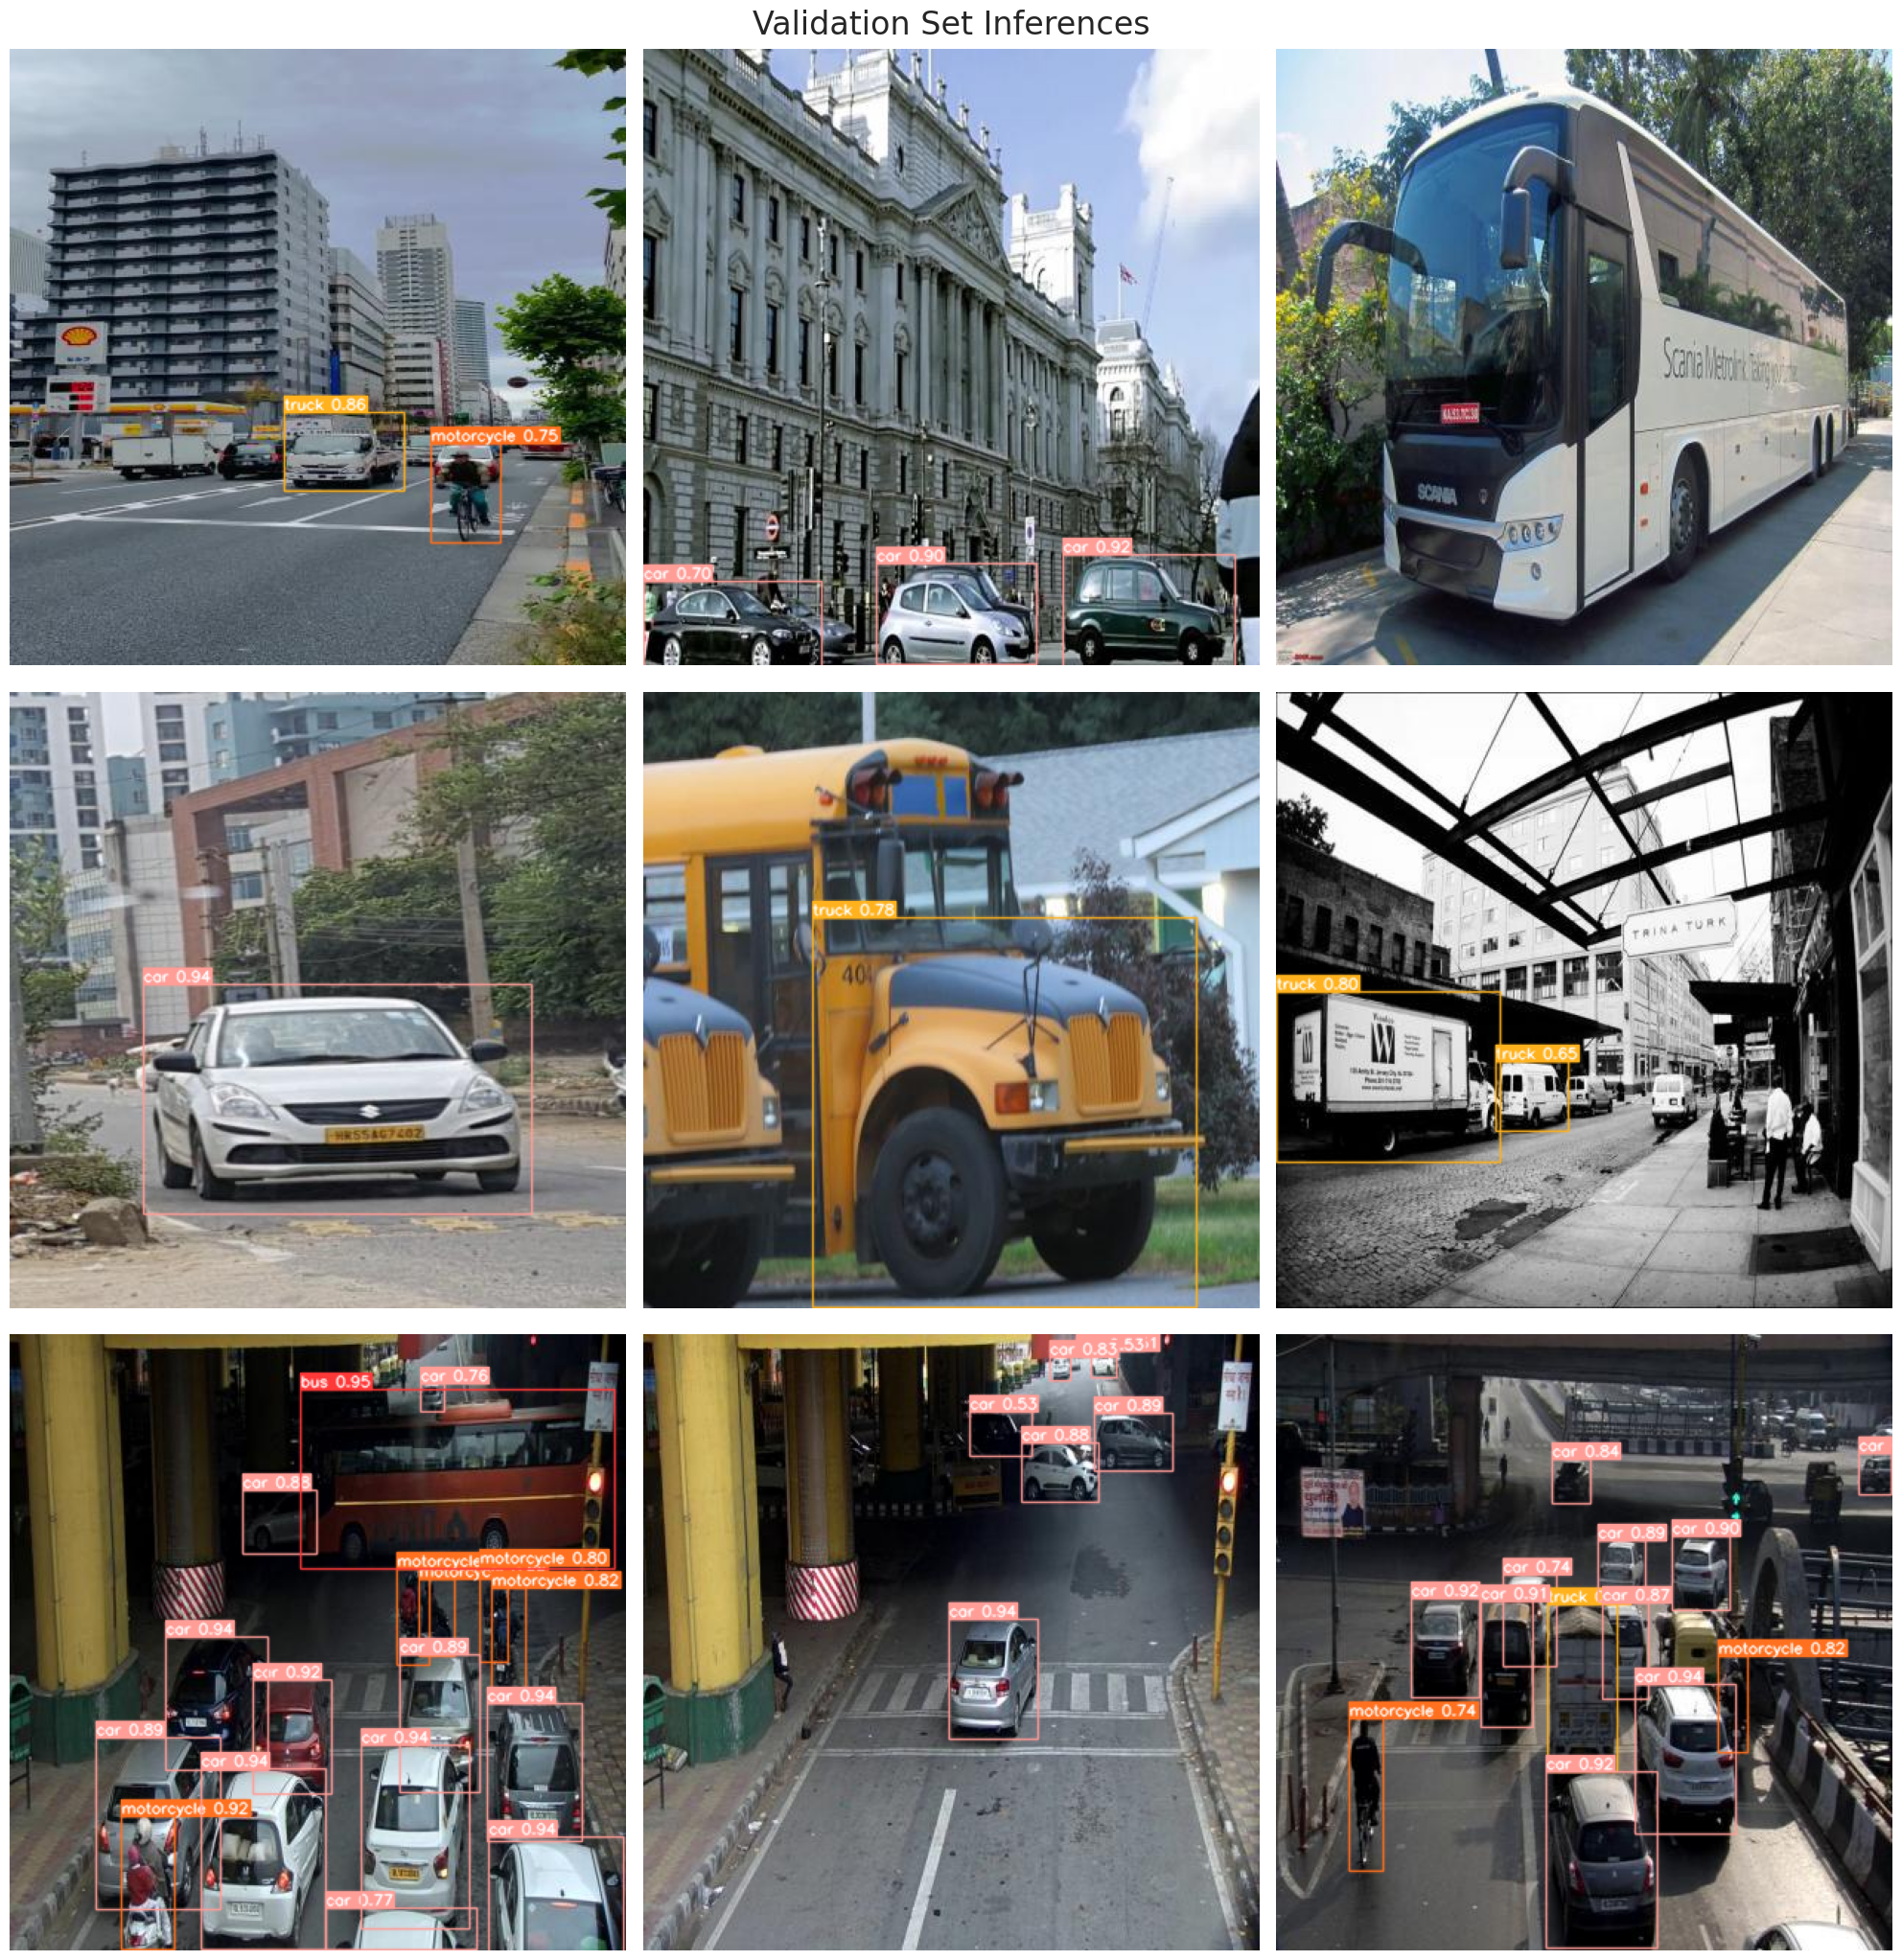

In [18]:
# Define the path to the validation images
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

# Initialize the subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()


image 1/1 /content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg: 640x640 1 truck, 16.3ms
Speed: 3.7ms preprocess, 16.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


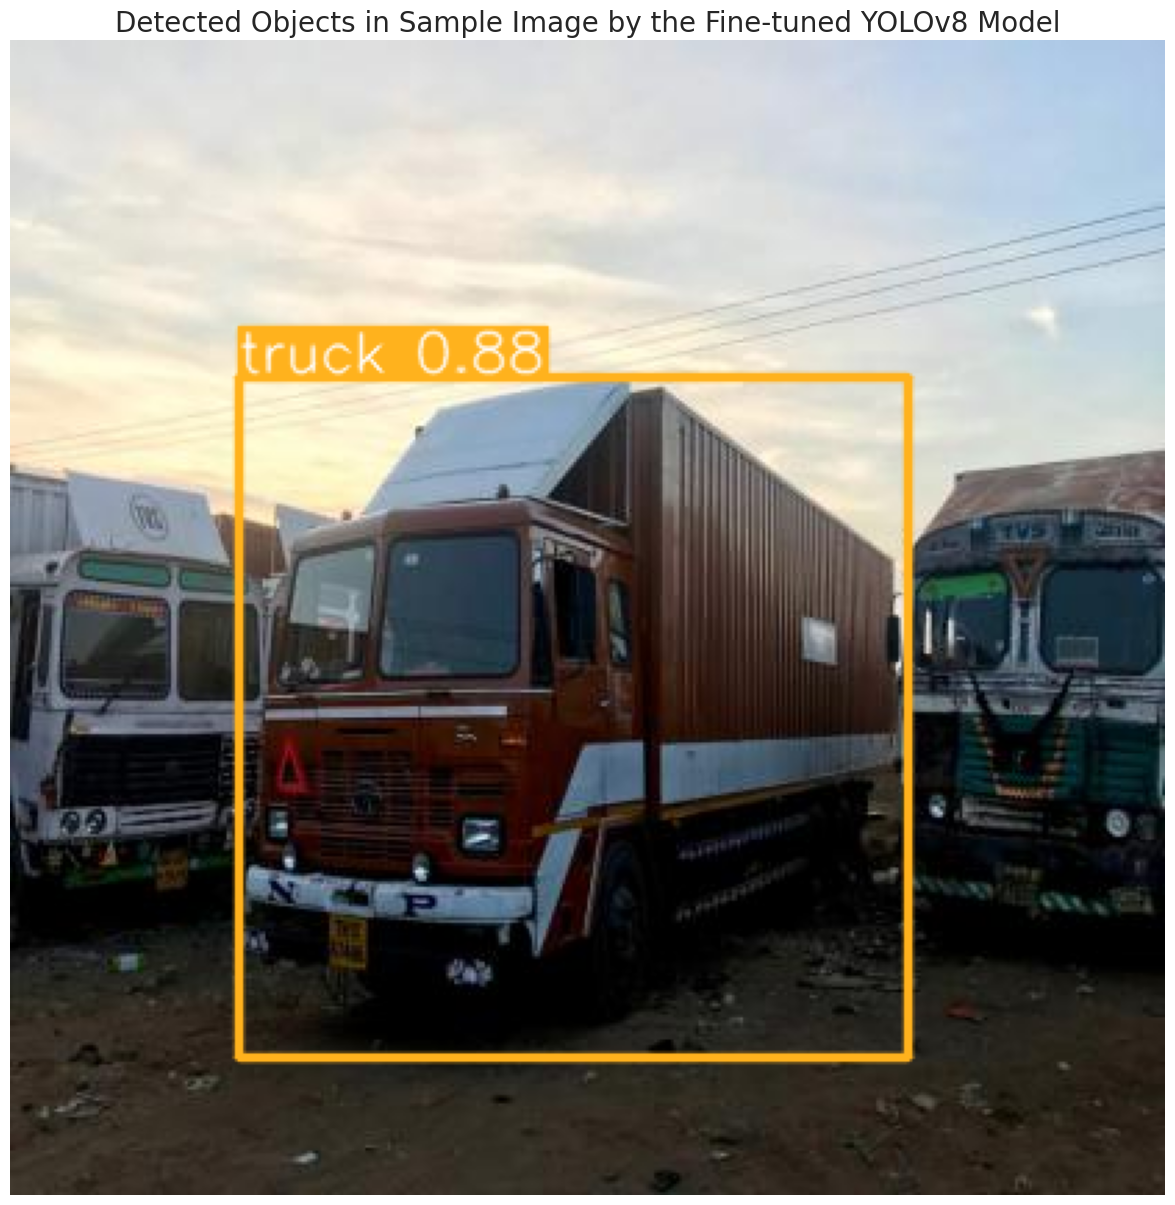

In [19]:
# Path to the image file
sample_image_path = '/content/drive/MyDrive/Transport Detection.v1i.yolov8/valid/images/00--395-_jpg.rf.b793ffe18c13b1e011e24674ebd32651.jpg'

# Perform inference on the provided image using best model
results = best_model.predict(source=sample_image_path, imgsz=640, conf=0.7)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Fine-tuned YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()